## Contents<a id='Contents'></a>
* [Data wrangling](#Data_wrangling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
    * [Recap Of Data Science Problem](#Recap_Of_Data_Science_Problem)
    * [Data Source](#data_source)
    * [API_request](#api_request)
    * [Load the Data](#load_data)
    
  * [Imports](#Imports)
  * [Objectives](#Objectives)
  * [Load The Crime reports Data](#load_data)
  * [Date Column Manipulations](#date_manipulations)
  * [Number of missing values by column](#missing_columns)
  * [save the wrangled file](#save_file)
  * [Summary of Data Wrangling](#summary)
     

### Introduction<a id='Introduction'>
    
This step focuses on collecting the data, organizing it, and making sure it's well defined. Some data cleaning will be done at this stage.

### Recap Of Data Science Problem<a id='Recap_Of_Data_Science_Problem'>
    
The purpose of this data science project is to come up with machine learning models that will provide guidance to Austin Police Department(APD) and provide safety measures to Austin Public by informing them about the safe negihborhoods.


### Data Source<a id='data_source'>
    
Data is provided by APD and dataset owner is APD PIO(Public Information Officer). 

### IMPORTS<a id='Imports'>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
from sodapy import Socrata
#requires conda installation of missingno
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

from dotenv import load_dotenv
load_dotenv()
app_token=os.getenv('AUSTEX_API_TOKEN')

#print(app_token)



### API request<a id='api_request'>

In [3]:
x = requests.get(f"https://data.austintexas.gov/resource/fdj4-gpfu.json?$limit=2000000&$$app_token={app_token}")

In [4]:
print(x.status_code)

200


### Load the Data<a id='load_data'>

In [5]:
df=pd.DataFrame(data=x.json())

In [46]:
df.head()

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,:@computed_region_qwte_z96m,:@computed_region_e9j2_6w3z,:@computed_region_5gse_m7ik,clearance_status,clearance_date,ucr_category,category_description
0,2023491535,ASSAULT BY CONTACT FAM/DATING,902,Y,2023-02-18T23:55:00.000,2023-02-18T00:00:00.000,2355,2023-02-18T23:55:00.000,2023-02-18T00:00:00.000,2355,...,3641,4,9,1114,78,2,NaN,NaN,NaN,NaN
1,2023491436,POSS CONTROLLED SUB/NARCOTIC,1800,N,2023-02-18T23:27:00.000,2023-02-18T00:00:00.000,2327,2023-02-18T23:27:00.000,2023-02-18T00:00:00.000,2327,...,3640,9,10,1081,68,6,C,2023-02-19T00:00:00.000,NaN,NaN
2,2023491425,THEFT,600,N,2023-02-18T23:24:00.000,2023-02-18T00:00:00.000,2324,2023-02-18T23:24:00.000,2023-02-18T00:00:00.000,2324,...,2865,9,10,1169,36,6,NaN,NaN,23H,Theft
3,2023491475,TERRORISTIC THREAT,2704,N,2023-02-18T23:04:00.000,2023-02-18T00:00:00.000,2304,2023-02-18T23:04:00.000,2023-02-18T00:00:00.000,2304,...,3641,4,9,202,43,2,NaN,NaN,NaN,NaN
4,2023491472,DOC DISCHARGE GUN - PUB PLACE,2408,N,2023-02-18T23:03:00.000,2023-02-18T00:00:00.000,2303,2023-02-18T23:48:00.000,2023-02-18T00:00:00.000,2348,...,3256,3,3,NaN,46,1,NaN,NaN,NaN,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 33 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   incident_report_number       object
 1   crime_type                   object
 2   ucr_code                     object
 3   family_violence              object
 4   occ_date_time                object
 5   occ_date                     object
 6   occ_time                     object
 7   rep_date_time                object
 8   rep_date                     object
 9   rep_time                     object
 10  location_type                object
 11  address                      object
 12  zip_code                     object
 13  council_district             object
 14  sector                       object
 15  district                     object
 16  pra                          object
 17  census_tract                 object
 18  x_coordinate                 object
 19  y_coordinate         

I notice six columns which are generated based on zipcode and zoning. I do not require it. so dropping thhose columns. 

In [48]:
#out of 33 columns, removing the below 6. keeping 27 for now
drop_columns = [':@computed_region_a3it_2a2z',':@computed_region_8spj_utxs',':@computed_region_q9nd_rr82',':@computed_region_e9j2_6w3z',':@computed_region_5gse_m7ik',':@computed_region_qwte_z96m']
df_27 = df.drop(drop_columns, axis=1)

In [49]:
df_27.columns

Index(['incident_report_number', 'crime_type', 'ucr_code', 'family_violence',
       'occ_date_time', 'occ_date', 'occ_time', 'rep_date_time', 'rep_date',
       'rep_time', 'location_type', 'address', 'zip_code', 'council_district',
       'sector', 'district', 'pra', 'census_tract', 'x_coordinate',
       'y_coordinate', 'latitude', 'longitude', 'location', 'clearance_status',
       'clearance_date', 'ucr_category', 'category_description'],
      dtype='object')

In [50]:
drop_columns = ['incident_report_number', 'ucr_code', 'family_violence',
       
        'pra', 'census_tract', 'x_coordinate', 'y_coordinate',
        'ucr_category', 'category_description']

In [51]:
df_27_new = df_27.drop(drop_columns, axis=1)

In [52]:
df_27_new.shape

(2000000, 18)

In [53]:
df_27_new.dtypes

crime_type          object
occ_date_time       object
occ_date            object
occ_time            object
rep_date_time       object
rep_date            object
rep_time            object
location_type       object
address             object
zip_code            object
council_district    object
sector              object
district            object
latitude            object
longitude           object
location            object
clearance_status    object
clearance_date      object
dtype: object

In [54]:
# need to convert datetime columns from object data type to date types
df_27_new['occured_date'] = pd.to_datetime(df_27_new['occ_date_time'],format='%Y-%m-%d')

In [55]:
df_27_new.rename(columns = {'occured_date':'occurred_date'}, inplace = True)

In [56]:
df_27_new.columns

Index(['crime_type', 'occ_date_time', 'occ_date', 'occ_time', 'rep_date_time',
       'rep_date', 'rep_time', 'location_type', 'address', 'zip_code',
       'council_district', 'sector', 'district', 'latitude', 'longitude',
       'location', 'clearance_status', 'clearance_date', 'occurred_date'],
      dtype='object')

In [57]:
df_27_new['reported_date'] = pd.to_datetime(df_27_new['rep_date_time'],format='%Y-%m-%d')

In [58]:
df_27_new.columns

Index(['crime_type', 'occ_date_time', 'occ_date', 'occ_time', 'rep_date_time',
       'rep_date', 'rep_time', 'location_type', 'address', 'zip_code',
       'council_district', 'sector', 'district', 'latitude', 'longitude',
       'location', 'clearance_status', 'clearance_date', 'occurred_date',
       'reported_date'],
      dtype='object')

In [59]:
df_27_new.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date
0,ASSAULT BY CONTACT FAM/DATING,2023-02-18T23:55:00.000,2023-02-18T00:00:00.000,2355,2023-02-18T23:55:00.000,2023-02-18T00:00:00.000,2355,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,30.33748689,-97.70997634,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00
1,POSS CONTROLLED SUB/NARCOTIC,2023-02-18T23:27:00.000,2023-02-18T00:00:00.000,2327,2023-02-18T23:27:00.000,2023-02-18T00:00:00.000,2327,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,30.3142963,-97.71996482,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00
2,THEFT,2023-02-18T23:24:00.000,2023-02-18T00:00:00.000,2324,2023-02-18T23:24:00.000,2023-02-18T00:00:00.000,2324,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,30.30467246,-97.71280824,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00
3,TERRORISTIC THREAT,2023-02-18T23:04:00.000,2023-02-18T00:00:00.000,2304,2023-02-18T23:04:00.000,2023-02-18T00:00:00.000,2304,PARKING /DROP LOT/ GARAGE,7622 N IH 35 SVRD SB,78752,4,ID,8,30.33890768,-97.70200101,"{'latitude': '30.33890768', 'longitude': '-97....",NaN,NaN,2023-02-18 23:04:00,2023-02-18 23:04:00
4,DOC DISCHARGE GUN - PUB PLACE,2023-02-18T23:03:00.000,2023-02-18T00:00:00.000,2303,2023-02-18T23:48:00.000,2023-02-18T00:00:00.000,2348,RESIDENCE / HOME,6118 FAIRWAY ST,78741,3,HE,3,30.2290038,-97.70310131,"{'latitude': '30.2290038', 'longitude': '-97.7...",NaN,NaN,2023-02-18 23:03:00,2023-02-18 23:48:00


In [60]:
drop_columns = ['occ_date_time', 'occ_date', 'occ_time', 'rep_date_time', 'rep_date','rep_time']
df_27_new = df_27_new.drop(drop_columns, axis=1)

In [61]:
df_27_new.head()

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date
0,ASSAULT BY CONTACT FAM/DATING,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,30.33748689,-97.70997634,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00
1,POSS CONTROLLED SUB/NARCOTIC,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,30.3142963,-97.71996482,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00
2,THEFT,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,30.30467246,-97.71280824,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00
3,TERRORISTIC THREAT,PARKING /DROP LOT/ GARAGE,7622 N IH 35 SVRD SB,78752,4,ID,8,30.33890768,-97.70200101,"{'latitude': '30.33890768', 'longitude': '-97....",NaN,NaN,2023-02-18 23:04:00,2023-02-18 23:04:00
4,DOC DISCHARGE GUN - PUB PLACE,RESIDENCE / HOME,6118 FAIRWAY ST,78741,3,HE,3,30.2290038,-97.70310131,"{'latitude': '30.2290038', 'longitude': '-97.7...",NaN,NaN,2023-02-18 23:03:00,2023-02-18 23:48:00


In [62]:
df_27_new.columns

Index(['crime_type', 'location_type', 'address', 'zip_code',
       'council_district', 'sector', 'district', 'latitude', 'longitude',
       'location', 'clearance_status', 'clearance_date', 'occurred_date',
       'reported_date'],
      dtype='object')

In [63]:
df_27_new.shape

(2000000, 14)

In [64]:
df_14 = df_27_new

In [65]:
df_14.shape

(2000000, 14)

### Date Column Manipulations<a id='date_manipulations'>

In [66]:
df_14['month'] = df_14['occurred_date'].apply(lambda x: x.strftime('%B')) 

In [67]:
df_14.head(3)

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date,month
0,ASSAULT BY CONTACT FAM/DATING,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,30.33748689,-97.70997634,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00,February
1,POSS CONTROLLED SUB/NARCOTIC,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,30.3142963,-97.71996482,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00,February
2,THEFT,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,30.30467246,-97.71280824,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00,February


In [68]:
df_14['year'] = df_14['occurred_date'].apply(lambda x: x.strftime('%Y')) 

In [70]:
df_14.head(3)

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date,month,year
0,ASSAULT BY CONTACT FAM/DATING,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,30.33748689,-97.70997634,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00,February,2023
1,POSS CONTROLLED SUB/NARCOTIC,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,30.3142963,-97.71996482,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00,February,2023
2,THEFT,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,30.30467246,-97.71280824,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00,February,2023


In [71]:
df_14.year.unique()

array(['2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016',
       '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005'], dtype=object)

In [72]:
df_14['hour'] = df_14['occurred_date'].dt.hour

In [73]:
df_14.head(3)

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date,month,year,hour
0,ASSAULT BY CONTACT FAM/DATING,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,30.33748689,-97.70997634,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00,February,2023,23
1,POSS CONTROLLED SUB/NARCOTIC,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,30.3142963,-97.71996482,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00,February,2023,23
2,THEFT,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,30.30467246,-97.71280824,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00,February,2023,23


In [74]:
df_14.shape

(2000000, 17)

In [75]:
df_17= df_14

In [76]:
df_17.head()

,crime_type,location_type,address,zip_code,council_district,sector,district,latitude,longitude,location,clearance_status,clearance_date,occurred_date,reported_date,month,year,hour
0,ASSAULT BY CONTACT FAM/DATING,RESIDENCE / HOME,107 W CROSLIN ST,78752,4,ID,8,30.33748689,-97.70997634,"{'latitude': '30.33748689', 'longitude': '-97....",NaN,NaN,2023-02-18 23:55:00,2023-02-18 23:55:00,February,2023,23
1,POSS CONTROLLED SUB/NARCOTIC,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,5100 DUVAL ST,78751,9,ID,6,30.3142963,-97.71996482,"{'latitude': '30.3142963', 'longitude': '-97.7...",C,2023-02-19T00:00:00.000,2023-02-18 23:27:00,2023-02-18 23:27:00,February,2023,23
2,THEFT,RESIDENCE / HOME,4611 N IH 35 SVRD NB,78722,9,BA,4,30.30467246,-97.71280824,"{'latitude': '30.30467246', 'longitude': '-97....",NaN,NaN,2023-02-18 23:24:00,2023-02-18 23:24:00,February,2023,23
3,TERRORISTIC THREAT,PARKING /DROP LOT/ GARAGE,7622 N IH 35 SVRD SB,78752,4,ID,8,30.33890768,-97.70200101,"{'latitude': '30.33890768', 'longitude': '-97....",NaN,NaN,2023-02-18 23:04:00,2023-02-18 23:04:00,February,2023,23
4,DOC DISCHARGE GUN - PUB PLACE,RESIDENCE / HOME,6118 FAIRWAY ST,78741,3,HE,3,30.2290038,-97.70310131,"{'latitude': '30.2290038', 'longitude': '-97.7...",NaN,NaN,2023-02-18 23:03:00,2023-02-18 23:48:00,February,2023,23


### Number of missing values by column<a id='missing_columns'>

<AxesSubplot:>

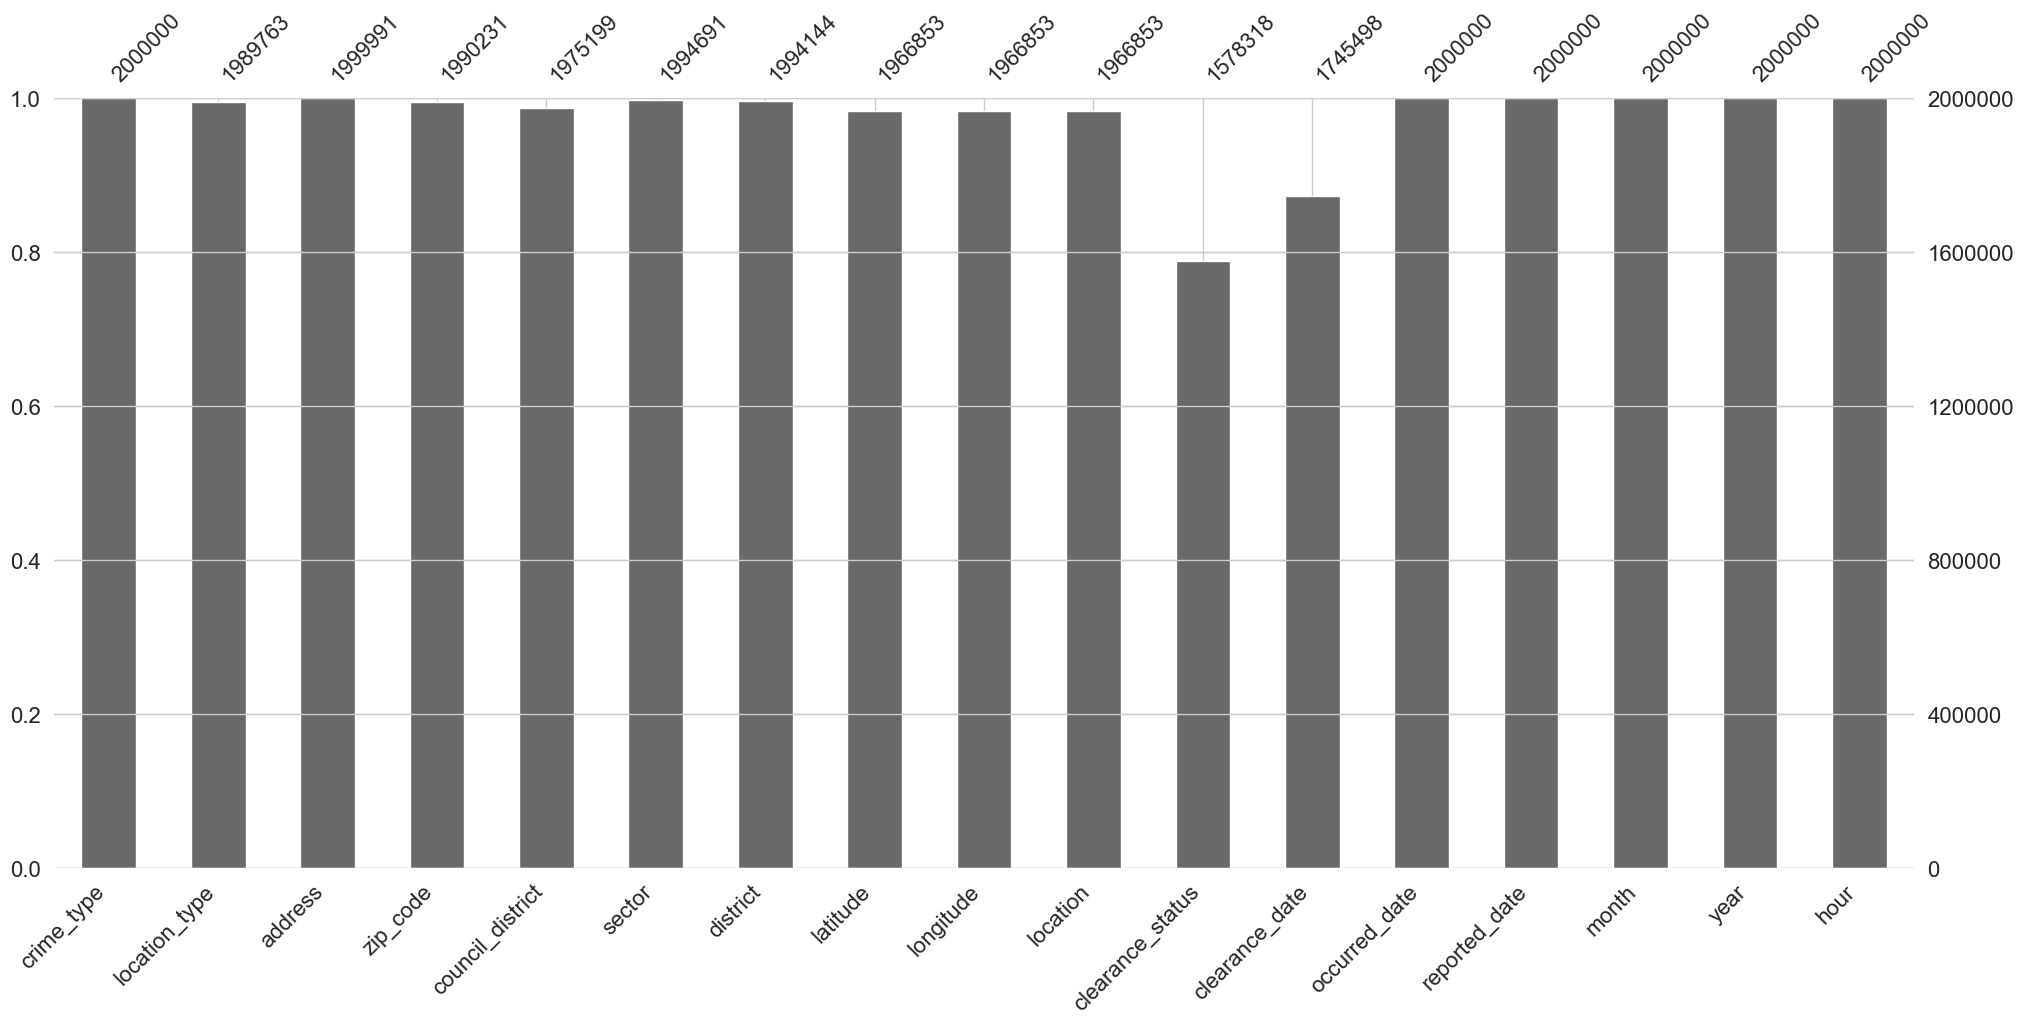

In [77]:
msno.bar(df_17)

In [78]:
missing = pd.concat([df_17.isnull().sum(), 100 * df_17.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values('count', ascending=False)

,count,%
clearance_status,421682,21.08410
clearance_date,254502,12.72510
longitude,33147,1.65735
latitude,33147,1.65735
location,33147,1.65735
council_district,24801,1.24005
location_type,10237,0.51185
zip_code,9769,0.48845
district,5856,0.29280
sector,5309,0.26545


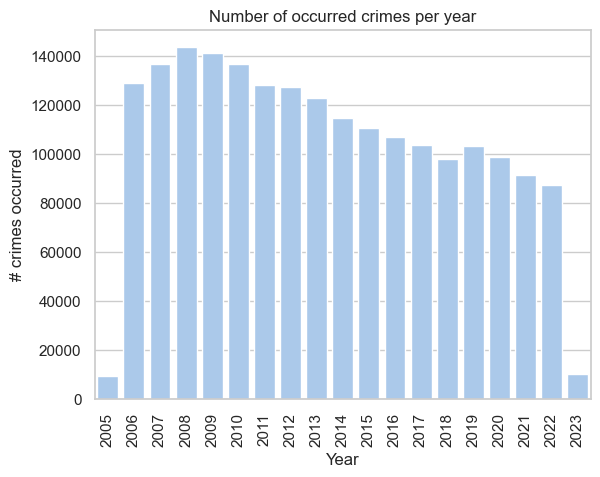

In [79]:
crimes_per_year = df_17['year'].value_counts().sort_index()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

g = sns.barplot(x=crimes_per_year.index, y=crimes_per_year.values,color='b')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set(xlabel='Year', ylabel='# crimes occurred')
plt.title('Number of occurred crimes per year')
plt.show()

Good to see the decline in the crime since 2008!

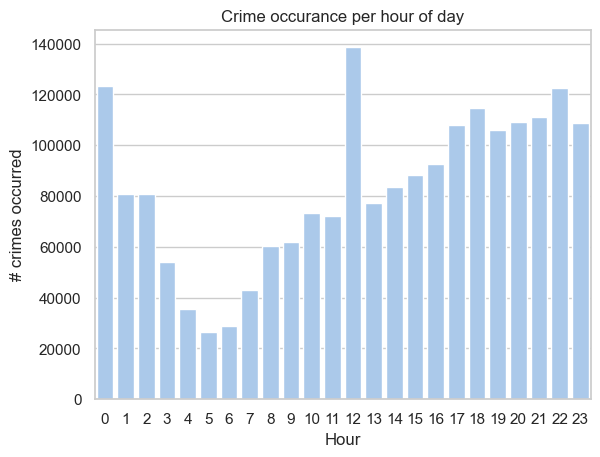

In [80]:
crimes_per_hour = df_17['hour'].value_counts().sort_index()
g = sns.barplot(x=crimes_per_hour.index, y=crimes_per_hour.values, color='b')
g.set(xlabel='Hour', ylabel='# crimes occurred')
plt.title('Crime occurance per hour of day')
plt.show()

Crimes happen maximum during noon time. 

### save the wrangled file<a id='save_file'>

In [81]:
#saving this file
csv_name = "df_crime_reports.csv"
df_17.to_csv(csv_name, index=False)

###  Summary of Data Wrangling<a id='summary'>

(a)  Ingested 2 million records into a Jupyter Notebook. 

(b) Following are the dimensions associated with the project:
'crime_type', 'location_type', 'address', 'zip_code', 'latitude',
'longitude', 'location', 'clearance_status', 'clearance_date', 'occurred_date', 'reported_date', 'hour','year','month'

(c) Determine the number of time series across each dimension, and
across all dimensions. ???

(d) Identify the target and its type (categorical/non-categorical).crime_type and location

(e) Identify whether there are features in addition to time and the target.
These are sometimes called "Exogenous Variables".
Also determine the type of each feature, and whether they are
categorical or non-categorical.

If additional Exogenous Variables are not present, determine
if it makes senses to augment the dataset with them. ???

(f) Identify the resolution of TS (meaning: hourly, daily, weekly,
monthly, etc.) - Hourly Time series 

(g) According to the business problem determine the type of
resolution to be used in the project, and what is called the
"forecasting horizon", which is the number of time units for
which the forecast will be computed. In our case, 
resolution will be hourly, the forecasting horizon will be for 24 hours.
In general, this depends on the needs of the client.

(h) As needed, perform appropriate aggregations according to (g).

(i) Decide whether you want to store the "wrangled" dataset using
a different format. For instance, if (h/e) were needed you will
have to address this point. ???

